In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


✅ Step 1 — Create Missing Features BEFORE Split

In [69]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [70]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df['Title'] = df['Title'].replace({
    'Mlle':'Miss',
    'Ms':'Miss',
    'Mme':'Mrs'
})

df['Title'] = df['Title'].replace([
    'Lady','Countess','Capt','Col','Don','Dr',
    'Major','Rev','Sir','Jonkheer','Dona'
], 'Rare')

<>:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
<>:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
C:\Users\Venkatesh\AppData\Local\Temp\ipykernel_45156\864421591.py:1: SyntaxWarning: "\." is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\."? A raw string is also an option.
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


✅ Step 2 — Drop Unnecessary Columns

In [71]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [72]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,2,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,2,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,1,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,2,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,1,Mr


✅ Step 3 — Train-Test Split Again

In [73]:
from sklearn.model_selection import train_test_split 

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

✅ Step 4 — Now Pipeline Fit

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier

numeric_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Sex', 'Embarked', 'Title']

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_features),
    ('cat', categorical_pipeline, categorical_features)
])

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

✅ STEP 6 — Now Fit

In [75]:
full_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

🔎 If Still Error — Do This Immediately

In [76]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [77]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

In [78]:
print(X_train.columns.tolist())

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Title']


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

for name, model in models.items():
    
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = acc
    
    print(f"\n{name}")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")


Logistic Regression
Accuracy : 0.8101
Precision: 0.7778
Recall   : 0.7568
F1 Score : 0.7671

KNN
Accuracy : 0.7765
Precision: 0.7500
Recall   : 0.6892
F1 Score : 0.7183

SVM
Accuracy : 0.8101
Precision: 0.7941
Recall   : 0.7297
F1 Score : 0.7606

Decision Tree
Accuracy : 0.7989
Precision: 0.7436
Recall   : 0.7838
F1 Score : 0.7632

Random Forest
Accuracy : 0.8156
Precision: 0.7733
Recall   : 0.7838
F1 Score : 0.7785

Gradient Boosting
Accuracy : 0.8324
Precision: 0.8235
Recall   : 0.7568
F1 Score : 0.7887

AdaBoost
Accuracy : 0.8268
Precision: 0.8028
Recall   : 0.7703
F1 Score : 0.7862


In [80]:
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

print("\nModel Ranking:")
for model, score in sorted_results:
    print(f"{model}: {score:.4f}")


Model Ranking:
Gradient Boosting: 0.8324
AdaBoost: 0.8268
Random Forest: 0.8156
Logistic Regression: 0.8101
SVM: 0.8101
Decision Tree: 0.7989
KNN: 0.7765


In [81]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import AdaBoostClassifier 

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 1]
}

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', AdaBoostClassifier(random_state=42))
])

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'model__learning_rate': 0.1, 'model__n_estimators': 200}
Best Score: 0.8159460258051808


In [ ]:
pip install xgboost

✅ Step 1 — Import XGBoost

In [84]:
from xgboost import XGBClassifier

✅ Step 2 — Create Model

In [85]:
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric = 'logloss'
)

✅ Step 3 — Add to Your Pipeline

In [86]:
from sklearn.pipeline import Pipeline 

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

✅ Step 4 — Train Model

In [87]:
xgb_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers co

✅ Step 5 — Predictions

In [88]:
y_pred = xgb_pipeline.predict(X_test)

✅ Step 6 — Evaluation

In [89]:
from sklearn.metrics import accuracy_score, classification_report 

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBoost Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



🔥 Step 7 — Feature Importance

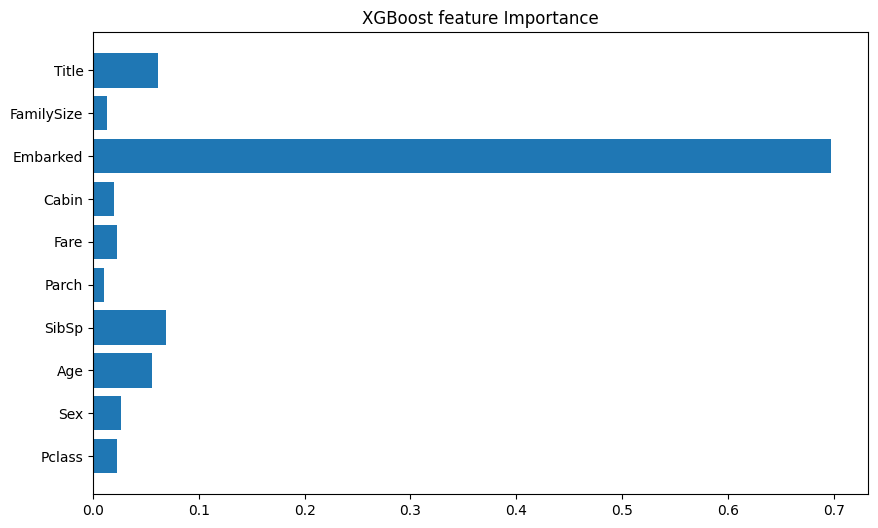

In [93]:
import matplotlib.pyplot as plt 

model = xgb_pipeline.named_steps['model']

plt.figure(figsize=(10,6))
plt.barh(X.columns, model.feature_importances_)
plt.title("XGBoost feature Importance")
plt.show()

🚀 Step 8 — Hyperparameter Tuning (Starter)

In [95]:
from sklearn.model_selection import GridSearchCV 

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.01, 0.1]
}

grid = GridSearchCV(
    xgb_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
Best Score: 0.8314291342460358
